In [1]:
import pandas as pd
from sklearn.svm import SVR
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV
%matplotlib inline

In [2]:
df = pd.read_csv('sudeste_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9779168 entries, 0 to 9779167
Data columns (total 31 columns):
wsid    int64
wsnm    object
elvt    float64
lat     float64
lon     float64
inme    object
city    object
prov    object
mdct    object
date    object
yr      int64
mo      int64
da      int64
hr      int64
prcp    float64
stp     float64
smax    float64
smin    float64
gbrd    float64
temp    float64
dewp    float64
tmax    float64
dmax    float64
tmin    float64
dmin    float64
hmdy    float64
hmax    float64
hmin    float64
wdsp    float64
wdct    float64
gust    float64
dtypes: float64(20), int64(5), object(6)
memory usage: 2.3+ GB


In [4]:
df.describe()

,wsid,elvt,lat,lon,yr,mo,da,hr,prcp,stp,...,tmax,dmax,tmin,dmin,hmdy,hmax,hmin,wdsp,wdct,gust
count,9.779168e+06,9.779168e+06,9.779168e+06,9.779168e+06,9.779168e+06,9.779168e+06,9.779168e+06,9.779168e+06,1.407984e+06,9.779168e+06,...,9.779142e+06,9.778858e+06,9.779134e+06,9.778361e+06,9.779168e+06,9.779156e+06,9.779124e+06,8.853607e+06,9.779168e+06,9.462694e+06
mean,3.592531e+02,5.940923e+02,-2.023082e+01,-4.464590e+01,2.011164e+03,6.521960e+00,1.575465e+01,1.150000e+01,9.366544e-01,8.804292e+02,...,2.110503e+01,1.524025e+01,1.986418e+01,1.422089e+01,6.726667e+01,6.996991e+01,6.441965e+01,1.998156e+00,1.385991e+02,4.494015e+00
std,3.901630e+01,3.980379e+02,3.172643e+00,4.882117e+00,3.207774e+00,3.425538e+00,8.802154e+00,6.922190e+00,2.923291e+00,2.482650e+02,...,7.545549e+00,5.866811e+00,7.134849e+00,5.777089e+00,2.654213e+01,2.643371e+01,2.656550e+01,1.618531e+00,1.052018e+02,2.981790e+00
min,1.780000e+02,0.000000e+00,-2.496282e+01,-5.667732e+01,2.000000e+03,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,-3.200000e+00,-1.000000e+01,-8.500000e+00,-1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.280000e+02,2.830000e+02,-2.239580e+01,-4.743410e+01,2.009000e+03,4.000000e+00,8.000000e+00,5.000000e+00,0.000000e+00,9.113000e+02,...,1.820000e+01,1.270000e+01,1.720000e+01,1.160000e+01,5.300000e+01,5.800000e+01,4.900000e+01,8.000000e-01,5.600000e+01,2.300000e+00
50%,3.580000e+02,5.730000e+02,-2.075041e+01,-4.445378e+01,2.011000e+03,7.000000e+00,1.600000e+01,1.200000e+01,0.000000e+00,9.442000e+02,...,2.190000e+01,1.660000e+01,2.080000e+01,1.560000e+01,7.400000e+01,7.800000e+01,7.000000e+01,1.700000e+00,1.140000e+02,4.200000e+00
75%,3.940000e+02,8.750000e+02,-1.891707e+01,-4.243575e+01,2.014000e+03,9.000000e+00,2.300000e+01,1.800000e+01,6.000000e-01,9.731000e+02,...,2.580000e+01,1.940000e+01,2.420000e+01,1.840000e+01,8.900000e+01,9.100000e+01,8.600000e+01,2.900000e+00,2.160000e+02,6.300000e+00
max,4.230000e+02,1.758000e+03,0.000000e+00,0.000000e+00,2.016000e+03,1.200000e+01,3.100000e+01,2.300000e+01,1.000000e+02,1.050000e+03,...,4.500000e+01,4.480000e+01,4.500000e+01,4.490000e+01,1.000000e+02,1.000000e+02,1.000000e+02,1.980000e+01,3.600000e+02,5.000000e+01


In [5]:
df[~df.isnull().any(axis=1)]

,wsid,wsnm,elvt,lat,lon,inme,city,prov,mdct,date,...,tmax,dmax,tmin,dmin,hmdy,hmax,hmin,wdsp,wdct,gust
11,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 11:00:00,2007-11-06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 12:00:00,2007-11-06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 13:00:00,2007-11-06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
201,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-14 09:00:00,2007-11-14,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
214,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-14 22:00:00,2007-11-14,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
225,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-15 09:00:00,2007-11-15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
238,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-15 22:00:00,2007-11-15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
249,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-16 09:00:00,2007-11-16,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
273,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-17 09:00:00,2007-11-17,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
286,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-17 22:00:00,2007-11-17,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
df[df.isnull().any(axis=1)]

,wsid,wsnm,elvt,lat,lon,inme,city,prov,mdct,date,...,tmax,dmax,tmin,dmin,hmdy,hmax,hmin,wdsp,wdct,gust
0,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 00:00:00,2007-11-06,...,29.7,16.8,25.5,10.8,35.0,58.0,32.0,3.2,101.0,6.5
1,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 01:00:00,2007-11-06,...,29.9,13.6,29.0,12.2,39.0,39.0,35.0,3.6,94.0,6.4
2,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 02:00:00,2007-11-06,...,29.0,14.0,27.4,13.6,44.0,44.0,39.0,2.5,93.0,6.9
3,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 03:00:00,2007-11-06,...,27.4,16.9,25.8,14.1,58.0,58.0,44.0,1.7,96.0,5.8
4,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 04:00:00,2007-11-06,...,26.3,17.0,25.3,16.4,57.0,58.0,56.0,3.1,110.0,7.5
5,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 05:00:00,2007-11-06,...,25.4,16.4,23.8,16.0,62.0,62.0,57.0,2.0,99.0,6.8
6,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 06:00:00,2007-11-06,...,23.8,16.7,22.0,16.2,72.0,72.0,62.0,1.3,93.0,4.9
7,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 07:00:00,2007-11-06,...,22.0,17.8,19.5,16.6,86.0,89.0,72.0,0.5,157.0,2.8
8,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 08:00:00,2007-11-06,...,19.7,17.3,18.3,16.9,93.0,94.0,85.0,NaN,141.0,1.5
9,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 09:00:00,2007-11-06,...,22.9,18.3,18.2,17.1,75.0,94.0,75.0,NaN,248.0,NaN


In [12]:
data = df[['gust', 'prcp', 'tmax', 'dmax', 'dmin', 'hmdy', 'hmax', 'prov']]

In [13]:
data.groupby('prov').nunique()

,gust,prcp,tmax,dmax,dmin,hmdy,hmax,prov
prov,,,,,,,,
ES,234,232,363,314,319,91,92,1
MG,272,313,466,450,404,92,96,1
RJ,330,284,418,436,403,92,101,1
SP,251,295,453,459,424,92,96,1


In [14]:
data_RJ = data[data['prov'] == 'RJ'].drop(columns=['prov'])

In [15]:
aux = data_RJ[~data_RJ.isna().any(axis=1)]
valid_data = aux[aux > 0.0].dropna()
del aux

In [16]:
valid_data.head()

,gust,prcp,tmax,dmax,dmin,hmdy,hmax
1725,13.3,0.6,31.0,24.6,20.4,77.0,80.0
1979,1.8,0.2,24.2,22.7,22.1,90.0,94.0
1986,3.9,0.2,29.0,23.9,21.7,78.0,79.0
2084,8.2,2.0,26.0,23.8,23.2,91.0,91.0
2579,2.5,0.2,25.9,22.6,21.3,80.0,88.0


In [17]:
X_train, X_test, y_train, y_test = train_test_split(valid_data[valid_data.columns[1:]], valid_data[valid_data.columns[0]], train_size=0.01)

C:\Users\Thiago\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [18]:
X_train.shape

(1176, 6)

In [19]:
X_train['y'] = y_train

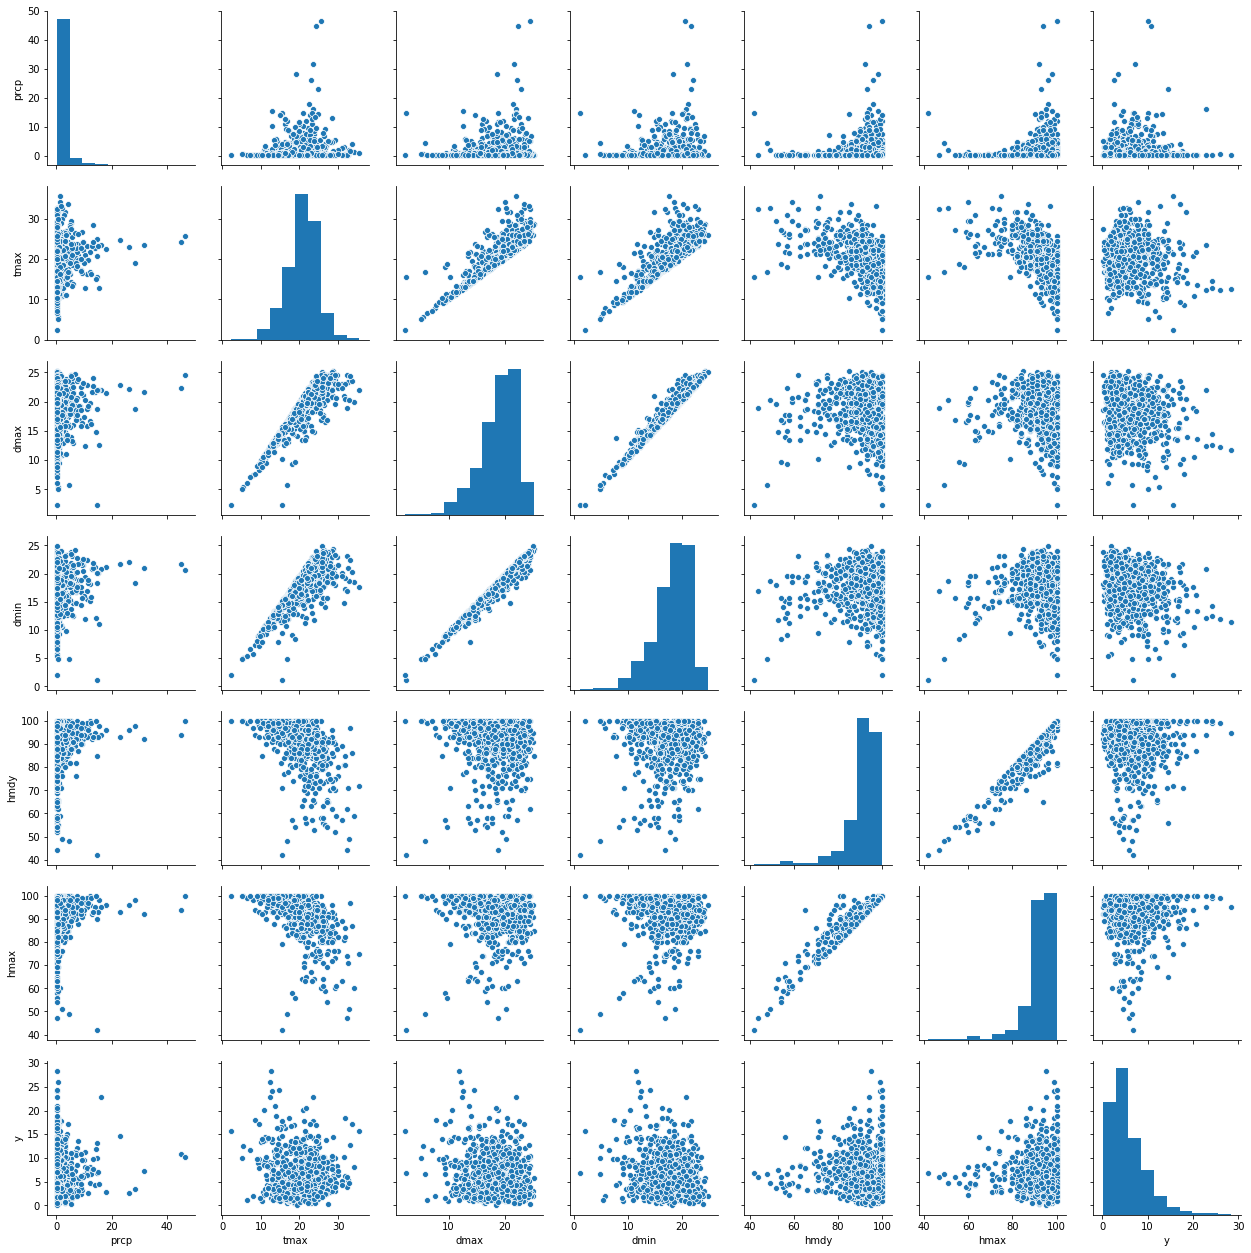

In [20]:
sns.pairplot(X_train)
plt.show()

In [21]:
X_train.drop(columns=['y'], inplace=True)

In [22]:
pca = PCA(.8)
standardScaler = StandardScaler()
standardScaler.fit(X_train)
pca.fit(standardScaler.transform(X_train))

PCA(copy=True, iterated_power='auto', n_components=0.8, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [23]:
svr = SVR()
%time svr.fit(pca.transform(standardScaler.transform(X_train)), y_train)

Wall time: 50.9 ms


C:\Users\Thiago\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [30]:
y_pred = svr.predict(pca.transform(standardScaler.transform(X_train)))

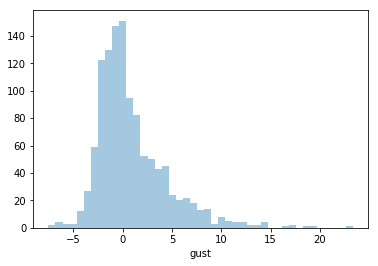

In [31]:
sns.distplot(y_train - y_pred, kde=False)

In [32]:
y_pred = svr.predict(pca.transform(standardScaler.transform(X_test)))

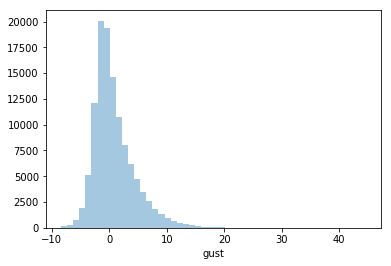

In [33]:
sns.distplot(y_test - y_pred, kde=False)

In [34]:
transformed_X_train = pca.transform(standardScaler.transform(X_train))

In [35]:
p_cs = 2. ** np.arange(-5,12)
p_gammas = 2. ** np.arange(-13,2)
p_epsilon = 1. ** np.arange(-5,5)
model_cv=GridSearchCV(SVR(kernel='rbf'),{'C':p_cs,'gamma':p_gammas, 'epsilon':p_epsilon},cv=10,verbose=True, n_jobs=3)
model_cv.fit(transformed_X_train, y_train)

Fitting 10 folds for each of 2550 candidates, totalling 25500 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  92 tasks      | elapsed:    3.2s
[Parallel(n_jobs=3)]: Done 692 tasks      | elapsed:   14.0s
[Parallel(n_jobs=3)]: Done 1692 tasks      | elapsed:   31.0s
[Parallel(n_jobs=3)]: Done 3092 tasks      | elapsed:   59.9s
[Parallel(n_jobs=3)]: Done 4892 tasks      | elapsed:  1.5min
[Parallel(n_jobs=3)]: Done 7092 tasks      | elapsed:  2.2min
[Parallel(n_jobs=3)]: Done 9692 tasks      | elapsed:  3.0min
[Parallel(n_jobs=3)]: Done 12692 tasks      | elapsed:  4.0min
[Parallel(n_jobs=3)]: Done 16092 tasks      | elapsed:  5.3min
[Parallel(n_jobs=3)]: Done 19892 tasks      | elapsed:  7.1min
[Parallel(n_jobs=3)]: Done 22504 tasks      | elapsed:  9.5min
[Parallel(n_jobs=3)]: Done 24184 tasks      | elapsed: 12.7min
[Parallel(n_jobs=3)]: Done 25500 out of 25500 | elapsed: 17.0min finished
C:\Users\Thiago\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: 

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=3,
       param_grid={'C': array([3.125e-02, 6.250e-02, 1.250e-01, 2.500e-01, 5.000e-01, 1.000e+00,
       2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01, 3.200e+01, 6.400e+01,
       1.280e+02, 2.560e+02, 5.120e+02, 1.024e+03, 2.048e+03]), 'gamma': array([1.22070e-04, 2.44141e-04, 4.88281e-04, 9.76562e-04, 1.953...5.00000e-01, 1.00000e+00, 2.00000e+00]), 'epsilon': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

In [36]:
model_cv.best_params_

{'C': 2.0, 'epsilon': 1.0, 'gamma': 2.0}

In [38]:
y_pred = model_cv.predict(pca.transform(standardScaler.transform(X_train)))

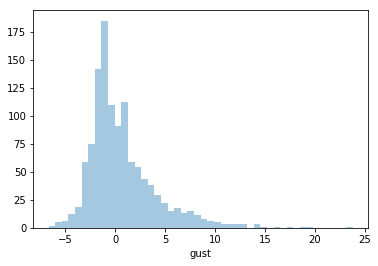

In [39]:
sns.distplot(y_train - y_pred, kde=False)

In [40]:
y_pred = model_cv.predict(pca.transform(standardScaler.transform(X_test)))

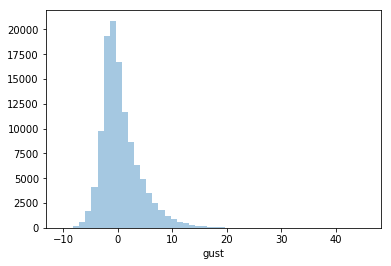

In [41]:
sns.distplot(y_test - y_pred, kde=False)

In [46]:
model_cv.score(pca.transform(standardScaler.transform(X_train)), y_train)

0.19406177450473738

In [53]:
model_cv.score(pca.transform(standardScaler.transform(X_test)), y_test)

0.09229195865105477